
<a name="top"></a>
# <div style="text-align: center"> <u>Data Science Capstone Project </u> </div>
# <div style="text-align: center"><u>_The Battle of the Neighborhoods_<u/></div>



## <u>Table of contents</u>

<div class="alert alert-block alert-info" style="margin-top: 20px">

* [Introduction: Business Problem](#introduction)
* [Data](#data)
* [Methodology](#methodology)
* [Analysis](#analysis)
* [Results and Discussion](#results)
* [Conclusion](#conclusion)


## <u>Introduction: Business Problem</u><a name="introduction"></a>


<p style='text-align: justify;'> Yerevan  is the capital and largest city of Armenia as well as one of the world's oldest continuously inhabited cities. Situated along the Hrazdan River, Yerevan is the administrative, cultural, and industrial center of the country. It has been the capital since 1918, the fourteenth in the history of Armenia and the seventh located in or around the Ararat plain. The city also serves as the seat of the Araratian Pontifical Diocese; the largest diocese of the Armenian Apostolic Church and one of the oldest dioceses in the world.</p>

<p style='text-align: justify;'>With the growth of the Armenian economy, Yerevan has undergone major transformation. Much construction has been done throughout the city since the early 2000s, and retail outlets such as restaurants, shops, and street cafés, which were rare during Soviet times, have multiplied. As of 2011, the population of Yerevan was 1,060,138, just over 35% of the Republic of Armenia's total population. According to the official estimate of 2016, the current population of the city is 1,073,700. Yerevan was named the 2012 World Book Capital by UNESCO. Yerevan is an associate member of Eurocities. </p>
<p> </p>
<div style='text-align: justify;'>The objective of this project is to identify the best potential districts where a restaurant can be set up.  The analysis and the results of this project would interest stakeholders who are interested in opening a restaurant in Yerevan. </div>


Based on the criteria specified above, the factors that will influence the final decision are: 
* Number of existing restaurants in the district 
* Number of  other places of entertainment, hotels, shops, etc. in the district
The following data sources will be needed to extract/generate the required information: -
* List of all districts in Yerevan - https://en.wikipedia.org/wiki/Districts_of_Yerevan
* Coordinates of all neighbourhoods and venues - **GeoPy Nominatim geocoding**
* Number of restaurants and their  location in every district - **Foursquare API** - 
 https://developer.foursquare.com



## <u>Methodology</u><a name="methodology"></a>

In this project the first step will be to collect data on the districts of Yerevan from the internet. There are no relevant datasets available for this and therefore, data will need to be scraped from a webpage. The location coordinates of each district will  be read from csv file and appended to the district data. Using this data, a folium map of the Yerevan  will be created.

The second step will be to explore each of districts and their venues using Foursquare location data. The venues of the districts will be analyzed in detail and patterns will be discovered. This discovery of patterns will be carried out by grouping the districts using k-means clustering. Following this, each cluster will be examined and a decision will be made regarding which cluster fits the stakeholders requirements. The factor that will determine this is the frequency of occurrence of restaurants and other food venues within the cluster.

The results of the analysis will highlight potential district  where a restaurant may be opened. 

## <u>Analysis</u><a name="analysis"></a>

### Importing Libraries <a name="import"></a>

In [55]:
!pip install --user beautifulsoup4
!pip install --user lxml
!pip install --user requests
!pip install --user pandas
!pip install --user geopy
!pip install --user folium
!pip install --user sklearn
!pip install --user matplotlib

import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation
 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
from IPython.display import display_html
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

import folium # plotting library
from bs4 import BeautifulSoup

# import k-means from clustering stage
from sklearn.cluster import KMeans
import matplotlib.cm as cm
import matplotlib.colors as colors

print('Libraries imported.')

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the

### Web Scraping District Data <a name="scrapenh"></a>

In [57]:
source = requests.get('https://en.wikipedia.org/wiki/Districts_of_Yerevan').text
soup=BeautifulSoup(source, 'lxml')
table = str(soup.table)
display_html(table,raw=True)

District,Armenian,Population (2011 census),Population (2016 estimate),Area (km²)
Ajapnyak,Աջափնյակ,"108,282","109,100",25.82
Arabkir,Արաբկիր,"117,704","115,800",13.29
Avan,Ավան,"53,231","53,100",7.26
Davtashen,Դավթաշեն,"42,380","42,500",6.47
Erebuni,Էրեբունի,"123,092","126,500",47.49
Kanaker-Zeytun,Քանաքեռ-Զեյթուն,"73,886","74,100",7.73
Kentron,Կենտրոն,"125,453","125,700",13.35
Malatia-Sebastia,Մալաթիա-Սեբաստիա,"132,900","135,900",25.16
Nork-Marash,Նորք-Մարաշ,"12,049","11,800",4.76
Nor Nork,Նոր Նորք,"126,065","130,300",14.11


### Loading Districts <a name="clean"></a>

In [61]:
df_source = pd.read_html(table)
df=df_source[0]
df.head()

,District,Armenian,Population (2011 census),Population (2016 estimate),Area (km²)
0,Ajapnyak,Աջափնյակ,108282,109100,25.82
1,Arabkir,Արաբկիր,117704,115800,13.29
2,Avan,Ավան,53231,53100,7.26
3,Davtashen,Դավթաշեն,42380,42500,6.47
4,Erebuni,Էրեբունի,123092,126500,47.49


In [62]:
df.shape

(12, 5)

### Obtaining Districts Coordinates  <a name="coordinates"></a>

In [64]:
df_coordinates = pd.read_csv('districts.csv')
df_coordinates.head()

,District,Latitude,Longitude
0,Ajapnyak,40.211567,44.416573
1,Arabkir,40.212991,44.480189
2,Avan,40.223600,44.557040
3,Davtashen,40.224784,44.465119
4,Erebuni,40.131373,44.515156


In [65]:
df_coordinates.columns=['District','Latitude','Longitude']
df_total = pd.merge(df, df_coordinates, on='District')
df_total

,District,Armenian,Population (2011 census),Population (2016 estimate),Area (km²),Latitude,Longitude
0,Ajapnyak,Աջափնյակ,108282,109100,25.82,40.211567,44.416573
1,Arabkir,Արաբկիր,117704,115800,13.29,40.212991,44.480189
2,Avan,Ավան,53231,53100,7.26,40.223600,44.557040
3,Davtashen,Դավթաշեն,42380,42500,6.47,40.224784,44.465119
4,Erebuni,Էրեբունի,123092,126500,47.49,40.131373,44.515156
5,Kanaker-Zeytun,Քանաքեռ-Զեյթուն,73886,74100,7.73,40.214590,44.502848
6,Kentron,Կենտրոն,125453,125700,13.35,40.178103,44.494913
7,Malatia-Sebastia,Մալաթիա-Սեբաստիա,132900,135900,25.16,40.185313,44.355868
8,Nork-Marash,Նորք-Մարաշ,12049,11800,4.76,40.180059,44.522229
9,Nor Nork,Նոր Նորք,126065,130300,14.11,40.183795,44.541669


### Yerevan Districts Map <a name="lamap"></a>

Obtaining the coordinates of the Yerevan center:

In [69]:
address = 'Yerevan, Armenia'
geolocator = Nominatim(user_agent="Yerevan")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Yerevan, Armenia are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Yerevan, Armenia are 40.1776121, 44.5125849.


Creating a map of Yerevan: 

In [72]:
map = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, district in zip(df_total['Latitude'], df_total['Longitude'], df_total['District']):
    label = district
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map)  
    
map

### Defining Foursquare Credentials and Version   <a name="foursquare"></a>

In [12]:
CLIENT_ID = 'VNWC5NGFMAXRA31IGYF10SB423XATFAMQEPVTD0RLCMJ4RGB' # my Foursquare ID
CLIENT_SECRET = 'O11DEZDTIXR3TSJHECUORJZQPQNR0QM0LIA3HSELA0HMUFOA' # my Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('My credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

My credentails:
CLIENT_ID: VNWC5NGFMAXRA31IGYF10SB423XATFAMQEPVTD0RLCMJ4RGB
CLIENT_SECRET:O11DEZDTIXR3TSJHECUORJZQPQNR0QM0LIA3HSELA0HMUFOA


In [13]:
RADIUS = 1200
LIMIT = 1000

venues_list = []

for latitude, longitude, district in zip(df_total['Latitude'], df_total['Longitude'], df_total['District']):
    print("Getting venues for district {} with coordinates {},{}".format(district, latitude, longitude))

    # create the API request URL
    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, VERSION, latitude, longitude, RADIUS, LIMIT)

    # make the GET request
    results = requests.get(url).json()["response"]['groups'][0]['items']

    # return only relevant information for each nearby venue
    venues_list.append([(
        district, 
        latitude, 
        longitude, 
        v['venue']['name'], 
        v['venue']['location']['lat'], 
        v['venue']['location']['lng'],  
        v['venue']['categories'][0]['name']) for v in results
    ])

venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])

if len(venues) > 0:
    venues.columns = ['District', 
                'District Latitude', 
                'District Longitude', 
                'Venue', 
                'Venue Latitude', 
                'Venue Longitude', 
                'Venue Category']

venues.head()

Getting venues for district Ajapnyak with coordinates 40.2115669,44.4165735
Getting venues for district Arabkir with coordinates 40.2129907,44.48018870000001
Getting venues for district Avan with coordinates 40.2235999,44.5570405
Getting venues for district Davtashen with coordinates 40.2247837,44.4651191
Getting venues for district Erebuni with coordinates 40.131373499999995,44.51515620000001
Getting venues for district Kanaker-Zeytun with coordinates 40.2145898,44.5028485
Getting venues for district Kentron with coordinates 40.1781026,44.4949131
Getting venues for district Malatia-Sebastia with coordinates 40.1853132,44.3558676
Getting venues for district Nork-Marash with coordinates 40.1800589,44.522228600000005
Getting venues for district Nor Nork with coordinates 40.1837946,44.541668900000005
Getting venues for district Nubarashen with coordinates 40.1027199,44.515232899999994
Getting venues for district Shengavit with coordinates 40.1353813,44.4306965


,District,District Latitude,District Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Arabkir,40.212991,44.480189,Yerevan Physics Institute Park | Երևանի ֆիզիկա...,40.204106,44.484004,Park
1,Arabkir,40.212991,44.480189,Tashir Pizza,40.218414,44.489403,Pizza Place
2,Arabkir,40.212991,44.480189,Kvartalplatz,40.211204,44.471614,Plaza
3,Arabkir,40.212991,44.480189,"Park of Republican hospital ""Lich/Լիճ""",40.205533,44.478537,Park
4,Arabkir,40.212991,44.480189,«Ֆիզիկայի» խաչմերուկ,40.204468,44.480502,Bus Station


In [ ]:
venues.shape

In [ ]:
print('There are {} uniques categories.'.format(len(venues['Venue Category'].unique())))

In [18]:
# one hot encoding
yerevan_onehot = pd.get_dummies(venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
yerevan_onehot['District'] = venues['District'] 

# move neighborhood column to the first column
fixed_columns = [yerevan_onehot.columns[-1]] + list(yerevan_onehot.columns[:-1])
yerevan_onehot = yerevan_onehot[fixed_columns]

yerevan_onehot.head()

,District,American Restaurant,Art Gallery,Asian Restaurant,BBQ Joint,Bakery,Bar,Bed & Breakfast,Border Crossing,Burger Joint,...,Tennis Court,Theater,Tram Station,Vegetarian / Vegan Restaurant,Warehouse Store,Whisky Bar,Wine Bar,Winery,Women's Store,Yoga Studio
0,Arabkir,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Arabkir,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Arabkir,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Arabkir,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Arabkir,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
yerevan_onehot.shape

(203, 87)

In [20]:
yerevan_grouped = yerevan_onehot.groupby('District').mean().reset_index()
yerevan_grouped

,District,American Restaurant,Art Gallery,Asian Restaurant,BBQ Joint,Bakery,Bar,Bed & Breakfast,Border Crossing,Burger Joint,...,Tennis Court,Theater,Tram Station,Vegetarian / Vegan Restaurant,Warehouse Store,Whisky Bar,Wine Bar,Winery,Women's Store,Yoga Studio
0,Arabkir,0.000000,0.000000,0.111111,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000
1,Avan,0.000000,0.000000,0.000000,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000
2,Davtashen,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.166667,0.000000,...,0.000000,0.000000,0.000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000
3,Erebuni,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.125,0.000000,0.25,0.000000,0.000000,0.000000,0.000000,0.000000
4,Kanaker-Zeytun,0.000000,0.000000,0.111111,0.055556,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000,0.055556,0.00,0.000000,0.000000,0.000000,0.000000,0.000000
5,Kentron,0.016129,0.000000,0.016129,0.016129,0.016129,0.016129,0.016129,0.000000,0.000000,...,0.016129,0.016129,0.000,0.000000,0.00,0.016129,0.016129,0.000000,0.016129,0.016129
6,Nor Nork,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000,0.000000,0.000000,...,0.000000,0.000000,0.000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000
7,Nork-Marash,0.000000,0.011111,0.000000,0.000000,0.022222,0.022222,0.011111,0.000000,0.022222,...,0.011111,0.000000,0.000,0.000000,0.00,0.000000,0.000000,0.011111,0.000000,0.000000


In [21]:
yerevan_grouped.shape

(8, 87)

In [22]:
num_top_venues = 5

for dist in yerevan_grouped['District']:
    print("----{}----".format(dist))
    temp = yerevan_grouped[yerevan_grouped['District'] == dist].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Arabkir----
                  venue  freq
0                 Plaza  0.22
1                  Park  0.22
2  Fast Food Restaurant  0.11
3      Asian Restaurant  0.11
4                Market  0.11


----Avan----
               venue  freq
0               Pool   0.2
1              Hotel   0.2
2          BBQ Joint   0.2
3  Mobile Phone Shop   0.2
4      Go Kart Track   0.2


----Davtashen----
             venue  freq
0       Restaurant  0.33
1         Gym Pool  0.17
2      Golf Course  0.17
3  Border Crossing  0.17
4             Pool  0.17


----Erebuni----
               venue  freq
0    Warehouse Store  0.25
1     Clothing Store  0.12
2             Market  0.12
3  Food & Drink Shop  0.12
4   Department Store  0.12


----Kanaker-Zeytun----
                         venue  freq
0                   Restaurant  0.17
1             Asian Restaurant  0.11
2                  Pizza Place  0.11
3                          Gym  0.06
4  Eastern European Restaurant  0.06


----Kentron----
            

In [23]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [24]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['District']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
district_venues_sorted = pd.DataFrame(columns=columns)
district_venues_sorted['District'] = yerevan_grouped['District']

for ind in np.arange(yerevan_grouped.shape[0]):
   district_venues_sorted.iloc[ind, 1:] = return_most_common_venues(yerevan_grouped.iloc[ind, :], num_top_venues)

district_venues_sorted.head(12)

,District,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Arabkir,Plaza,Park,Asian Restaurant,Fast Food Restaurant,Market,Bus Station,Pizza Place,French Restaurant,Eastern European Restaurant,Electronics Store
1,Avan,Hotel,BBQ Joint,Mobile Phone Shop,Go Kart Track,Pool,Bakery,Art Gallery,Flea Market,Food,Food & Drink Shop
2,Davtashen,Restaurant,Pool,Gym Pool,Border Crossing,Golf Course,French Restaurant,Eastern European Restaurant,Electronics Store,Fast Food Restaurant,Flea Market
3,Erebuni,Warehouse Store,Department Store,Tram Station,Food & Drink Shop,Market,Clothing Store,Motel,French Restaurant,Electronics Store,Fast Food Restaurant
4,Kanaker-Zeytun,Restaurant,Asian Restaurant,Pizza Place,Hotel,Supermarket,Gym / Fitness Center,Gym,Fast Food Restaurant,Eastern European Restaurant,Spa
5,Kentron,Clothing Store,Restaurant,Hotel,Museum,Diner,Grocery Store,Gym,Gym / Fitness Center,History Museum,Hot Dog Joint
6,Nor Nork,Hotel,Bed & Breakfast,Gourmet Shop,Pool,French Restaurant,Eastern European Restaurant,Electronics Store,Fast Food Restaurant,Flea Market,Food
7,Nork-Marash,Hotel,Café,Restaurant,Eastern European Restaurant,Coffee Shop,Plaza,Pub,Supermarket,Italian Restaurant,Jazz Club


In [25]:
from sklearn.metrics import silhouette_score

yerevan_grouped_clustering = yerevan_grouped.drop('District', 1)

for n_cluster in range(2, 8):
    kmeans = KMeans(n_clusters=n_cluster).fit(yerevan_grouped_clustering)
    label = kmeans.labels_
    sil_coeff = silhouette_score(yerevan_grouped_clustering, label, metric='euclidean')
    print("For n_clusters={}, The Silhouette Coefficient is {}".format(n_cluster, sil_coeff))

For n_clusters=2, The Silhouette Coefficient is 0.2079825101244714
For n_clusters=3, The Silhouette Coefficient is 0.16960088400984913
For n_clusters=4, The Silhouette Coefficient is 0.13769495851657723
For n_clusters=5, The Silhouette Coefficient is 0.12650226001527914
For n_clusters=6, The Silhouette Coefficient is 0.14445401668900565
For n_clusters=7, The Silhouette Coefficient is 0.06365482661203448


In [26]:
# set number of clusters
kclusters = 2

yerevan_grouped_clustering = yerevan_grouped.drop('District', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(yerevan_grouped_clustering)

# check cluster labels generated for each row in the data frame
kmeans.labels_

array([0, 1, 0, 0, 0, 0, 1, 0])

In [27]:
# add clustering labels
district_venues_sorted.insert(0, 'Cluster Label', kmeans.labels_.astype(int))
# district_venues_sorted['Cluster Label']=kmeans.labels_.astype(int)
yerevan_merged = venues

# merge yerevan_grouped with nhoods to add latitude/longitude for each Neighbourhood
yerevan_merged = yerevan_merged.join(district_venues_sorted.set_index('District'), on='District')
yerevan_merged.dropna(inplace=True)
yerevan_merged['Cluster Label'] = yerevan_merged['Cluster Label'].astype(int)
yerevan_merged.head() 

,District,District Latitude,District Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Cluster Label,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Arabkir,40.212991,44.480189,Yerevan Physics Institute Park | Երևանի ֆիզիկա...,40.204106,44.484004,Park,0,Plaza,Park,Asian Restaurant,Fast Food Restaurant,Market,Bus Station,Pizza Place,French Restaurant,Eastern European Restaurant,Electronics Store
1,Arabkir,40.212991,44.480189,Tashir Pizza,40.218414,44.489403,Pizza Place,0,Plaza,Park,Asian Restaurant,Fast Food Restaurant,Market,Bus Station,Pizza Place,French Restaurant,Eastern European Restaurant,Electronics Store
2,Arabkir,40.212991,44.480189,Kvartalplatz,40.211204,44.471614,Plaza,0,Plaza,Park,Asian Restaurant,Fast Food Restaurant,Market,Bus Station,Pizza Place,French Restaurant,Eastern European Restaurant,Electronics Store
3,Arabkir,40.212991,44.480189,"Park of Republican hospital ""Lich/Լիճ""",40.205533,44.478537,Park,0,Plaza,Park,Asian Restaurant,Fast Food Restaurant,Market,Bus Station,Pizza Place,French Restaurant,Eastern European Restaurant,Electronics Store
4,Arabkir,40.212991,44.480189,«Ֆիզիկայի» խաչմերուկ,40.204468,44.480502,Bus Station,0,Plaza,Park,Asian Restaurant,Fast Food Restaurant,Market,Bus Station,Pizza Place,French Restaurant,Eastern European Restaurant,Electronics Store


In [28]:
import matplotlib.colors as colors
from matplotlib.colors import rgb2hex
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=10)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]
rainbow[0] = '#FF0000'
rainbow[1]='#006ff6'
# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(yerevan_merged['District Latitude'], yerevan_merged['District Longitude'], yerevan_merged['District'], yerevan_merged['Cluster Label']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-2],
        fill=True,
        fill_color=rainbow[cluster-2],
        fill_opacity=0.7).add_to(map_clusters)
legend_html =   '''
                <div style="position: fixed; 
                            bottom: 100px; left: 50px; width: 120px; height: 80px; 
                            border:3px solid black; z-index:9999; font-size:13px;
                            ">&nbsp; Red - Cluster 0 <br>
                              &nbsp; Blue - Cluster 1 <br>
                                             </div>
                ''' 

map_clusters.get_root().html.add_child(folium.Element(legend_html))
map_clusters

In [29]:
yerevan_merged.loc[yerevan_merged['Cluster Label'] == 0, yerevan_merged.columns[[0] + list(range(2, yerevan_merged.shape[1]))]]

,District,District Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Cluster Label,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Arabkir,44.480189,Yerevan Physics Institute Park | Երևանի ֆիզիկա...,40.204106,44.484004,Park,0,Plaza,Park,Asian Restaurant,Fast Food Restaurant,Market,Bus Station,Pizza Place,French Restaurant,Eastern European Restaurant,Electronics Store
1,Arabkir,44.480189,Tashir Pizza,40.218414,44.489403,Pizza Place,0,Plaza,Park,Asian Restaurant,Fast Food Restaurant,Market,Bus Station,Pizza Place,French Restaurant,Eastern European Restaurant,Electronics Store
2,Arabkir,44.480189,Kvartalplatz,40.211204,44.471614,Plaza,0,Plaza,Park,Asian Restaurant,Fast Food Restaurant,Market,Bus Station,Pizza Place,French Restaurant,Eastern European Restaurant,Electronics Store
3,Arabkir,44.480189,"Park of Republican hospital ""Lich/Լիճ""",40.205533,44.478537,Park,0,Plaza,Park,Asian Restaurant,Fast Food Restaurant,Market,Bus Station,Pizza Place,French Restaurant,Eastern European Restaurant,Electronics Store
4,Arabkir,44.480189,«Ֆիզիկայի» խաչմերուկ,40.204468,44.480502,Bus Station,0,Plaza,Park,Asian Restaurant,Fast Food Restaurant,Market,Bus Station,Pizza Place,French Restaurant,Eastern European Restaurant,Electronics Store
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,Nork-Marash,44.522229,Lazio cafe-bar,40.189613,44.522499,Italian Restaurant,0,Hotel,Café,Restaurant,Eastern European Restaurant,Coffee Shop,Plaza,Pub,Supermarket,Italian Restaurant,Jazz Club
194,Nork-Marash,44.522229,Ulikhanyan Club,40.189443,44.520256,Jazz Club,0,Hotel,Café,Restaurant,Eastern European Restaurant,Coffee Shop,Plaza,Pub,Supermarket,Italian Restaurant,Jazz Club
195,Nork-Marash,44.522229,Traffic,40.189694,44.521302,Bar,0,Hotel,Café,Restaurant,Eastern European Restaurant,Coffee Shop,Plaza,Pub,Supermarket,Italian Restaurant,Jazz Club
196,Nork-Marash,44.522229,Pool @ Regineh Hotel,40.184439,44.533392,Pool,0,Hotel,Café,Restaurant,Eastern European Restaurant,Coffee Shop,Plaza,Pub,Supermarket,Italian Restaurant,Jazz Club


In [30]:
yerevan_merged.loc[yerevan_merged['Cluster Label'] == 1, yerevan_merged.columns[[0] + list(range(2, yerevan_merged.shape[1]))]]

,District,District Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Cluster Label,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
9,Avan,44.557040,Football Academy Pool,40.220179,44.556171,Pool,1,Hotel,BBQ Joint,Mobile Phone Shop,Go Kart Track,Pool,Bakery,Art Gallery,Flea Market,Food,Food & Drink Shop
10,Avan,44.557040,Play City,40.218663,44.557158,Go Kart Track,1,Hotel,BBQ Joint,Mobile Phone Shop,Go Kart Track,Pool,Bakery,Art Gallery,Flea Market,Food,Food & Drink Shop
11,Avan,44.557040,Old Mill,40.219922,44.565317,BBQ Joint,1,Hotel,BBQ Joint,Mobile Phone Shop,Go Kart Track,Pool,Bakery,Art Gallery,Flea Market,Food,Food & Drink Shop
12,Avan,44.557040,Avant Garde Hotel,40.219018,44.560884,Hotel,1,Hotel,BBQ Joint,Mobile Phone Shop,Go Kart Track,Pool,Bakery,Art Gallery,Flea Market,Food,Food & Drink Shop
13,Avan,44.557040,Beeline Kanaker,40.226056,44.547329,Mobile Phone Shop,1,Hotel,BBQ Joint,Mobile Phone Shop,Go Kart Track,Pool,Bakery,Art Gallery,Flea Market,Food,Food & Drink Shop
198,Nor Nork,44.541669,Panorama Hotel,40.175357,44.533813,Bed & Breakfast,1,Hotel,Bed & Breakfast,Gourmet Shop,Pool,French Restaurant,Eastern European Restaurant,Electronics Store,Fast Food Restaurant,Flea Market,Food
199,Nor Nork,44.541669,Hotel Regineh,40.184473,44.533121,Hotel,1,Hotel,Bed & Breakfast,Gourmet Shop,Pool,French Restaurant,Eastern European Restaurant,Electronics Store,Fast Food Restaurant,Flea Market,Food
200,Nor Nork,44.541669,Pool @ Regineh Hotel,40.184439,44.533392,Pool,1,Hotel,Bed & Breakfast,Gourmet Shop,Pool,French Restaurant,Eastern European Restaurant,Electronics Store,Fast Food Restaurant,Flea Market,Food
201,Nor Nork,44.541669,Nare ( Наре ),40.177669,44.538260,Hotel,1,Hotel,Bed & Breakfast,Gourmet Shop,Pool,French Restaurant,Eastern European Restaurant,Electronics Store,Fast Food Restaurant,Flea Market,Food
202,Nor Nork,44.541669,Aygestan,40.183415,44.528013,Gourmet Shop,1,Hotel,Bed & Breakfast,Gourmet Shop,Pool,French Restaurant,Eastern European Restaurant,Electronics Store,Fast Food Restaurant,Flea Market,Food


In [31]:
yerevan_results = pd.DataFrame(kmeans.cluster_centers_)
yerevan_results.columns = yerevan_grouped_clustering.columns
yerevan_results.index = ['Cluster 0','Cluster 1']
yerevan_results['Total Sum'] = yerevan_results.sum(axis = 1)
yerevan_results

,American Restaurant,Art Gallery,Asian Restaurant,BBQ Joint,Bakery,Bar,Bed & Breakfast,Border Crossing,Burger Joint,Bus Station,...,Theater,Tram Station,Vegetarian / Vegan Restaurant,Warehouse Store,Whisky Bar,Wine Bar,Winery,Women's Store,Yoga Studio,Total Sum
Cluster 0,0.002688,0.001852,0.039725,0.011947,0.006392,0.006392,0.00454,0.027778,0.003704,0.021207,...,0.002688,0.020833,0.009259,0.041667,0.002688,0.002688,0.001852,0.002688,0.002688,1.0
Cluster 1,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,0.10000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0


In [32]:
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

In [33]:
def generate_plot(clus,i):
    
    plt.style.use('default')

    tags=['Restaurant','Coffee','Food','Pizza','Sandwich']
    colors = []
    for value in clus.index: 
        if  any(t in value for t in tags):
            colors.append('#a80000')
        else:
            colors.append('#32069f')

    ax=clus.plot(kind='barh', figsize=(16,8), color=colors, alpha=0.7)

    plt.title('(in % of all venues)\n')
    ax.title.set_fontsize(14)
    plt.suptitle('Ten Most Prevalent Venues of Cluster {}'.format(i), fontsize=16)

    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)

    plt.xticks([])
    ax.tick_params(axis ='both', which ='both', length = 0)
    labels = [(item.get_text()+'  ') for item in ax.get_yticklabels()]
    ax.set_yticklabels(labels)

    for label in (ax.get_yticklabels()):
        label.set_fontsize(12)

    for index, value in enumerate(clus): 
        label = "%.1f " % round(value*100,1) + "%"
        # place text at the end of bar (adding 0.001 to x, and 0.1 from y to make it appear just after the bar)
        plt.annotate(label, xy=(value + 0.001, index - 0.1), color='black',fontsize=12)

    legend_elements = [Patch(facecolor='#a80000', edgecolor='#a80000',
                             label='Food Venues',alpha=0.7),
                       Patch(facecolor='#32069f', edgecolor='#32069f',
                             label='Others',alpha=0.7)]

    ax.legend(handles=legend_elements, loc='best',fontsize=12)

    plt.show()

,Restaurant,Plaza,Warehouse Store,Park,Asian Restaurant,Clothing Store,Market,Pizza Place,Gym Pool,Pool,...,Hostel,Mediterranean Restaurant,Music Venue,Library,Shipping Store,Seafood Restaurant,Salad Place,Tea Room,Go Kart Track,Gourmet Shop
Cluster 0,0.111589,0.047133,0.041667,0.041577,0.039725,0.039651,0.039352,0.037037,0.037037,0.032318,...,0.001852,0.001852,0.001852,0.001852,0.001852,0.001852,0.001852,0.001852,3.469447e-18,3.469447e-18


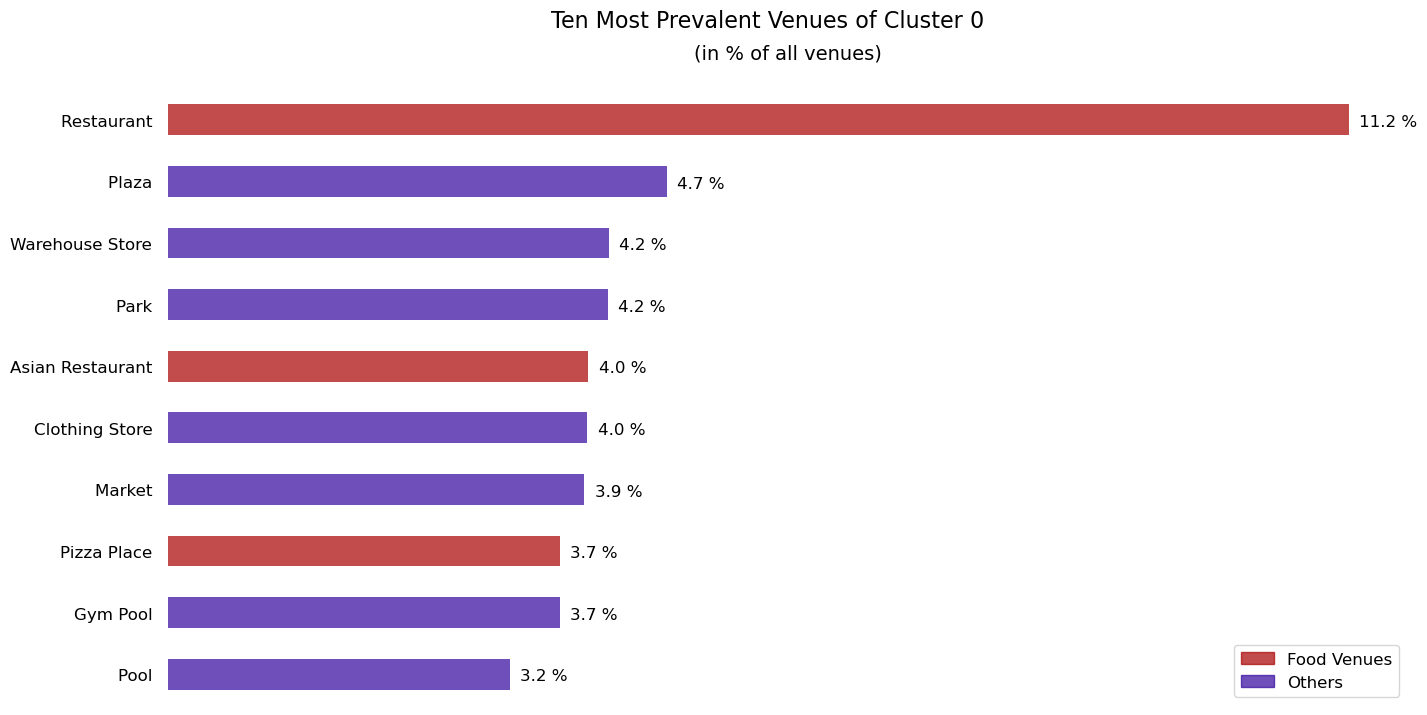

In [34]:
cluster0=pd.DataFrame(yerevan_results.iloc[0,0:-1]).transpose()
cluster0.sort_values(by='Cluster 0',axis=1,ascending=False,inplace=True)
display(cluster0)

clus0=cluster0.iloc[0,9::-1]
generate_plot(clus0,0)

,Hotel,Pool,Bed & Breakfast,Gourmet Shop,BBQ Joint,Mobile Phone Shop,Go Kart Track,Plaza,Pizza Place,Park,...,Greek Restaurant,Fast Food Restaurant,Golf Course,Gastropub,French Restaurant,Food Court,Food & Drink Shop,Food,Flea Market,Yoga Studio
Cluster 1,0.3,0.2,0.1,0.1,0.1,0.1,0.1,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


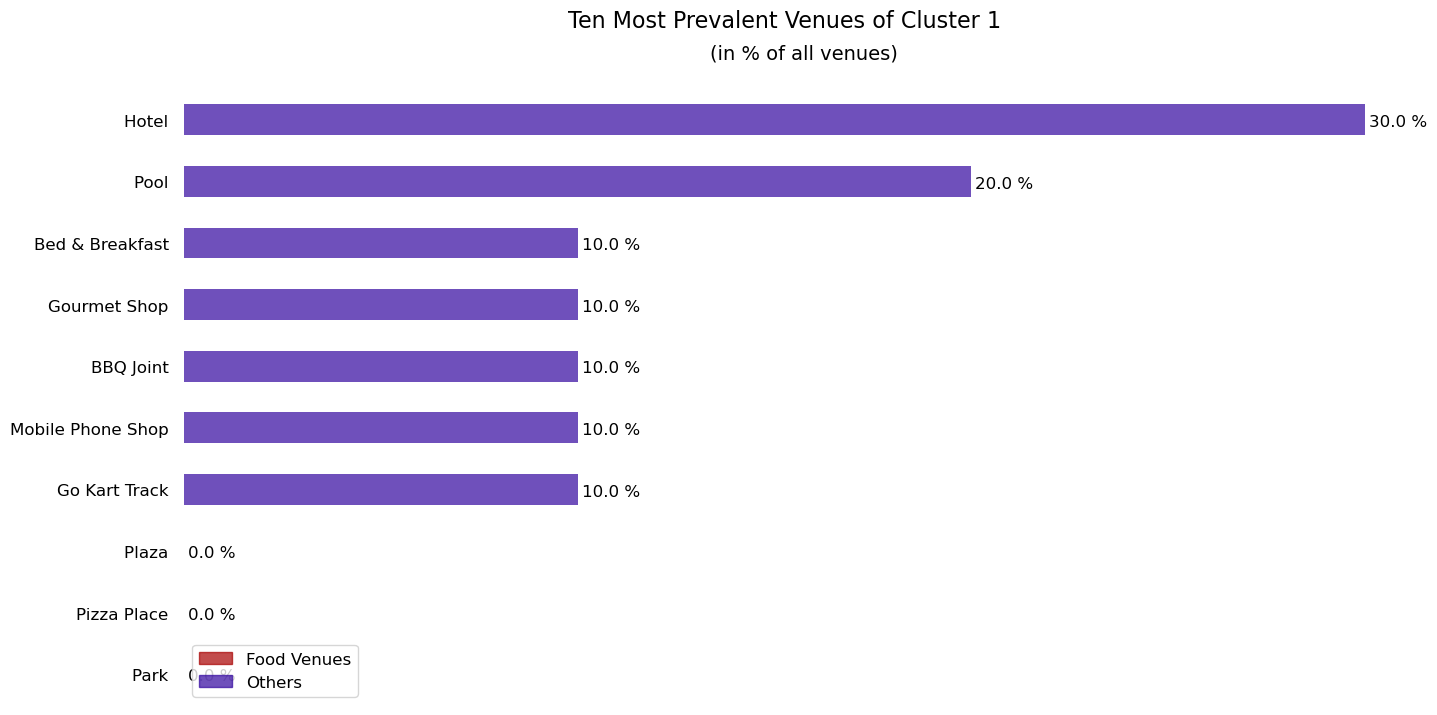

In [35]:
cluster1=pd.DataFrame(yerevan_results.iloc[1,0:-1]).transpose()
cluster1.sort_values(by='Cluster 1',axis=1,ascending=False,inplace=True)
display(cluster1)

clus1=cluster1.iloc[0,9::-1]
generate_plot(clus1,1)

In [36]:
clus1dist=yerevan_merged.loc[yerevan_merged['Cluster Label'] == 1, yerevan_merged.columns[0]].values.tolist()
clus1dist = list(dict.fromkeys(clus1dist))
clus1dist

['Avan', 'Nor Nork']

In [37]:
clus0dist=yerevan_merged.loc[yerevan_merged['Cluster Label'] == 0, yerevan_merged.columns[0]].values.tolist()
clus0dist = list(dict.fromkeys(clus0dist))
clus0dist

['Arabkir', 'Davtashen', 'Erebuni', 'Kanaker-Zeytun', 'Kentron', 'Nork-Marash']

In [38]:
filtered_districts=venues.copy()

for i in range(0,len(filtered_districts)):

    if filtered_districts.iloc[i,0] not in clus0dist:
        filtered_districts.iloc[i,0]='TO DROP'

In [39]:
filtered_districts=filtered_districts[filtered_districts.District!='TO DROP']
filtered_districts.reset_index(drop=True,inplace=True)

In [40]:
filtered_districts.head()

,District,District Latitude,District Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Arabkir,40.212991,44.480189,Yerevan Physics Institute Park | Երևանի ֆիզիկա...,40.204106,44.484004,Park
1,Arabkir,40.212991,44.480189,Tashir Pizza,40.218414,44.489403,Pizza Place
2,Arabkir,40.212991,44.480189,Kvartalplatz,40.211204,44.471614,Plaza
3,Arabkir,40.212991,44.480189,"Park of Republican hospital ""Lich/Լիճ""",40.205533,44.478537,Park
4,Arabkir,40.212991,44.480189,«Ֆիզիկայի» խաչմերուկ,40.204468,44.480502,Bus Station


In [41]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [42]:
def get_district_restaurants(url1):
    
    results = requests.get(url1).json()

    # assign relevant part of JSON to venues
    venues = results['response']['venues']

    # tranform venues into a data frame
    dataframe = json_normalize(venues)

    # keep only columns that include venue name, and anything that is associated with location
    filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
    dataframe_filtered = dataframe.loc[:, filtered_columns]

    # filter the category for each row
    dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

    # clean column names by keeping only last term
    dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]
    
    display(dataframe_filtered.loc[:,['name','categories','distance','lat','lng']])

In [43]:
category='4bf58dd8d48988d1c4941735'
radius = 1500
LIMIT=100

In [44]:
for n in range(0,len(filtered_districts)):
    url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&categoryId={}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    filtered_districts.iloc[n,1], 
    filtered_districts.iloc[n,2], 
    VERSION, 
    category, 
    radius, 
    LIMIT)
    print('------------------------------------------------- '+ filtered_districts.iloc[n,0] + ' -------------------------------------------------')
    get_district_restaurants(url)
    print('\n\n')

------------------------------------------------- Arabkir -------------------------------------------------


,name,categories,distance,lat,lng
0,Dolma,Restaurant,1222,40.219870,44.491397
1,Latar,Restaurant,1075,40.206126,44.471290
2,Odalen Restaurant,Restaurant,1181,40.215220,44.493776
3,Hrashq Aygi,Restaurant,1394,40.203384,44.469656
4,Genacvale Pandok,Restaurant,1895,40.206289,44.500680
5,Harich,Restaurant,1318,40.215662,44.495301
6,In Fusion,Restaurant,1443,40.221185,44.493354
7,Gandzaqar,Restaurant,1425,40.213074,44.496956
8,At the colonel,Restaurant,1523,40.216705,44.497438





------------------------------------------------- Arabkir -------------------------------------------------


,name,categories,distance,lat,lng
0,Dolma,Restaurant,1222,40.219870,44.491397
1,Latar,Restaurant,1075,40.206126,44.471290
2,Odalen Restaurant,Restaurant,1181,40.215220,44.493776
3,Hrashq Aygi,Restaurant,1394,40.203384,44.469656
4,Harich,Restaurant,1318,40.215662,44.495301
5,Genacvale Pandok,Restaurant,1895,40.206289,44.500680
6,In Fusion,Restaurant,1443,40.221185,44.493354
7,At the colonel,Restaurant,1523,40.216705,44.497438
8,Gandzaqar,Restaurant,1425,40.213074,44.496956





------------------------------------------------- Arabkir -------------------------------------------------


,name,categories,distance,lat,lng
0,Dolma,Restaurant,1222,40.219870,44.491397
1,Latar,Restaurant,1075,40.206126,44.471290
2,Odalen Restaurant,Restaurant,1181,40.215220,44.493776
3,Hrashq Aygi,Restaurant,1394,40.203384,44.469656
4,Genacvale Pandok,Restaurant,1895,40.206289,44.500680
5,Harich,Restaurant,1318,40.215662,44.495301
6,In Fusion,Restaurant,1443,40.221185,44.493354
7,Gandzaqar,Restaurant,1425,40.213074,44.496956
8,At the colonel,Restaurant,1523,40.216705,44.497438





------------------------------------------------- Arabkir -------------------------------------------------


,name,categories,distance,lat,lng
0,Dolma,Restaurant,1222,40.219870,44.491397
1,Latar,Restaurant,1075,40.206126,44.471290
2,Odalen Restaurant,Restaurant,1181,40.215220,44.493776
3,Hrashq Aygi,Restaurant,1394,40.203384,44.469656
4,In Fusion,Restaurant,1443,40.221185,44.493354
5,Genacvale Pandok,Restaurant,1895,40.206289,44.500680
6,Harich,Restaurant,1318,40.215662,44.495301
7,At the colonel,Restaurant,1523,40.216705,44.497438
8,Gandzaqar,Restaurant,1425,40.213074,44.496956





------------------------------------------------- Arabkir -------------------------------------------------


,name,categories,distance,lat,lng
0,Dolma,Restaurant,1222,40.219870,44.491397
1,Latar,Restaurant,1075,40.206126,44.471290
2,Odalen Restaurant,Restaurant,1181,40.215220,44.493776
3,Hrashq Aygi,Restaurant,1394,40.203384,44.469656
4,Genacvale Pandok,Restaurant,1895,40.206289,44.500680
5,Harich,Restaurant,1318,40.215662,44.495301
6,In Fusion,Restaurant,1443,40.221185,44.493354
7,At the colonel,Restaurant,1523,40.216705,44.497438
8,Gandzaqar,Restaurant,1425,40.213074,44.496956





------------------------------------------------- Arabkir -------------------------------------------------


,name,categories,distance,lat,lng
0,Dolma,Restaurant,1222,40.219870,44.491397
1,Latar,Restaurant,1075,40.206126,44.471290
2,Odalen Restaurant,Restaurant,1181,40.215220,44.493776
3,Hrashq Aygi,Restaurant,1394,40.203384,44.469656
4,In Fusion,Restaurant,1443,40.221185,44.493354
5,Genacvale Pandok,Restaurant,1895,40.206289,44.500680
6,Harich,Restaurant,1318,40.215662,44.495301
7,Gandzaqar,Restaurant,1425,40.213074,44.496956
8,At the colonel,Restaurant,1523,40.216705,44.497438





------------------------------------------------- Arabkir -------------------------------------------------


,name,categories,distance,lat,lng
0,Dolma,Restaurant,1222,40.219870,44.491397
1,Latar,Restaurant,1075,40.206126,44.471290
2,Odalen Restaurant,Restaurant,1181,40.215220,44.493776
3,Hrashq Aygi,Restaurant,1394,40.203384,44.469656
4,In Fusion,Restaurant,1443,40.221185,44.493354
5,Genacvale Pandok,Restaurant,1895,40.206289,44.500680
6,Harich,Restaurant,1318,40.215662,44.495301
7,Gandzaqar,Restaurant,1425,40.213074,44.496956
8,At the colonel,Restaurant,1523,40.216705,44.497438





------------------------------------------------- Arabkir -------------------------------------------------


,name,categories,distance,lat,lng
0,Dolma,Restaurant,1222,40.219870,44.491397
1,Latar,Restaurant,1075,40.206126,44.471290
2,Odalen Restaurant,Restaurant,1181,40.215220,44.493776
3,Hrashq Aygi,Restaurant,1394,40.203384,44.469656
4,In Fusion,Restaurant,1443,40.221185,44.493354
5,Harich,Restaurant,1318,40.215662,44.495301
6,Genacvale Pandok,Restaurant,1895,40.206289,44.500680
7,Gandzaqar,Restaurant,1425,40.213074,44.496956
8,At the colonel,Restaurant,1523,40.216705,44.497438





------------------------------------------------- Arabkir -------------------------------------------------


,name,categories,distance,lat,lng
0,Dolma,Restaurant,1222,40.219870,44.491397
1,Latar,Restaurant,1075,40.206126,44.471290
2,Odalen Restaurant,Restaurant,1181,40.215220,44.493776
3,Hrashq Aygi,Restaurant,1394,40.203384,44.469656
4,In Fusion,Restaurant,1443,40.221185,44.493354
5,Harich,Restaurant,1318,40.215662,44.495301
6,Genacvale Pandok,Restaurant,1895,40.206289,44.500680
7,At the colonel,Restaurant,1523,40.216705,44.497438
8,Gandzaqar,Restaurant,1425,40.213074,44.496956





------------------------------------------------- Davtashen -------------------------------------------------


,name,categories,distance,lat,lng
0,The Vahakni Restaurant,Restaurant,915,40.219349,44.457029
1,Ureni,Restaurant,1060,40.225565,44.452688





------------------------------------------------- Davtashen -------------------------------------------------


,name,categories,distance,lat,lng
0,The Vahakni Restaurant,Restaurant,915,40.219349,44.457029
1,Ureni,Restaurant,1060,40.225565,44.452688





------------------------------------------------- Davtashen -------------------------------------------------


,name,categories,distance,lat,lng
0,The Vahakni Restaurant,Restaurant,915,40.219349,44.457029
1,Ureni,Restaurant,1060,40.225565,44.452688





------------------------------------------------- Davtashen -------------------------------------------------


,name,categories,distance,lat,lng
0,The Vahakni Restaurant,Restaurant,915,40.219349,44.457029
1,Ureni,Restaurant,1060,40.225565,44.452688





------------------------------------------------- Davtashen -------------------------------------------------


,name,categories,distance,lat,lng
0,The Vahakni Restaurant,Restaurant,915,40.219349,44.457029
1,Ureni,Restaurant,1060,40.225565,44.452688





------------------------------------------------- Davtashen -------------------------------------------------


,name,categories,distance,lat,lng
0,The Vahakni Restaurant,Restaurant,915,40.219349,44.457029
1,Ureni,Restaurant,1060,40.225565,44.452688





------------------------------------------------- Erebuni -------------------------------------------------


KeyError: "None of [Index(['name', 'categories', 'id'], dtype='object')] are in the [columns]"